In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import numpy as np

In [4]:
from numpy.random import randn

In [5]:
from scipy import stats 

In [6]:
import seaborn as sns

In [7]:
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics

C:\Users\dtele\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
import requests
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
import warnings

warnings.filterwarnings("ignore")

In [9]:
import sklearn.ensemble as ske

In [10]:
import logging
from optparse import OptionParser
import sys
from time import time

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer

In [12]:
taws_df = pd.read_excel('raw_records.xlsx', 'raw_records', index_col=None, na_values=['NA'])

In [13]:
taws_df.head()

Data_Source  record     ID Record_status  \
0  AESM obi_last ASME    1107  62883           NaN   
1  AESM obi_last ASME    1108  62884           NaN   
2  AESM obi_last ASME    1109  62885           NaN   
3  AESM obi_last ASME     111  61887           NaN   
4  AESM obi_last ASME    1110  62886           NaN   

                                         Description  \
0  J/Eng was checking the chemical racks, where h...   
1  One stay wire connected to Christmas Tree loos...   
2  I found out that Pilot combination ladder (P) ...   
3  AT (Time). One crew member kept food in microw...   
4  During loading operations in (Location) by shi...   

                                          Resolution  \
0  1)Empty drums should not be used for storing o...   
1  All stay wires should be checked for its funct...   
2                                                NaN   
3  while using micro wave it should not be left u...   
4  All crew was instructed not to walk under susp...   

                           Corrective_Action_lessons Short_title  \
0  RCA - Improper storage CA - Agree with the cor...         NaN   
1  RCA - Inadequate supervision and maintenance C...         NaN   
2  RCA - Inadequate supervision and maintenance C...         NaN   
3  We agree with the corrective action suggested ...         NaN   
4  RCA - Lack of knowledge and failure to warn CA...         NaN   

        General_Catigory Sub_Catigory          Primary_cause Detailed_cause  \
0  NEAR CHEMICAL RELEASE          NaN                 PEOPLE            NaN   
1                WEATHER          NaN  ENVIRONMENT / WEATHER            NaN   
2    EQUIPMENT CONDITION          NaN                 PEOPLE            NaN   
3              NEAR FIRE          NaN                 PEOPLE            NaN   
4        NEAR CRUSHED BY          NaN                 PEOPLE            NaN   

  Task  Equipment_Involved Sub_Equipment_Involved Location_on_vessel  \
0  NaN                 NaN                    NaN      STORAGE SPACE   
1  NaN      Christmas Tree                    NaN              OTHER   
2  NaN  Combination Ladder                    NaN               DECK   
3  NaN           Microwave                    NaN             GALLEY   
4  NaN                 NaN                    NaN               DECK   

  Vessel_Type          CAUSE_LEVEL_1  
0         NaN                 PEOPLE  
1         NaN  ENVIRONMENT / WEATHER  
2         NaN                 PEOPLE  
3         NaN                 PEOPLE  
4         NaN                 PEOPLE

In [14]:
uf1 = taws_df[taws_df['CAUSE_LEVEL_1'] == 'UNSPECIFIED']
uf1.head()
uf1.describe()
uf2 =uf1.sample(800)


In [15]:
or1 = taws_df[taws_df['CAUSE_LEVEL_1'] == 'ORGANIZATION']
or1.describe()
or2 = or1.sample(800)


In [16]:
en1 = taws_df[taws_df['CAUSE_LEVEL_1'] == 'ENVIRONMENT / WEATHER']
en1.describe()
en2 = en1.sample(800)


In [17]:
eq1 = taws_df[taws_df['CAUSE_LEVEL_1'] == 'EQUIPMENT']
eq1.describe()
eq2 = eq1.sample(800)


In [18]:
pe1 = taws_df[taws_df['CAUSE_LEVEL_1'] == 'PEOPLE']
pe1.describe()
pe2 = pe1.sample(800)


In [19]:
add = pd.concat([uf2,or2,en2,eq2,pe2]) 
add

Data_Source  record     ID            Record_status  \
67389       Q1_Tankerome_Tanker_2882     869  46209                      NaN   
72412  Tammie_file Th_Q4_2015_tanker    1867  70135                      NaN   
73945  Tammie_file Th_Q4_2015_tanker     999  69267                      NaN   
17860                   Crowley05_08    2011   8778  good company definition   
67192       Q1_Tankerome_Tanker_2759     746  46086                      NaN   
67809       Q1_Tankerome_Tanker_3390    1377  46717                      NaN   
72996  Tammie_file Th_Q4_2015_tanker     440  68708                      NaN   
44920                NYK_File_1_2016    1615  78838                      NaN   
71619  Tammie_file Th_Q4_2015_tanker    1634  69902                      NaN   
65740                            OSG    6495  38084                 packet13   
73874  Tammie_file Th_Q4_2015_tanker     934  69202                      NaN   
67945                Q2_Thome_Tanker    1352  48197                      NaN   
73057  Tammie_file Th_Q4_2015_tanker     242  68510                      NaN   
66850       Q1_Tankerome_Tanker_2392     379  45719                      NaN   
69905           Q3_2014_Thome_Tanker    1024  49648                      NaN   
57920                       OBI_ASME    4876  55243                      NaN   
71479  Tammie_file Th_Q4_2015_tanker    1039  69307                      NaN   
73559  Tammie_file Th_Q4_2015_tanker     674  68942                      NaN   
67013       Q1_Tankerome_Tanker_2623     610  45950                      NaN   
67779       Q1_Tankerome_Tanker_3360    1347  46687                      NaN   
72505  Tammie_file Th_Q4_2015_tanker    2103  70371                      NaN   
5608              AESM obi_last ASME    6349  68125                      NaN   
72284  Tammie_file Th_Q4_2015_tanker    1751  70019                      NaN   
67853       Q1_Tankerome_Tanker_3443    1430  46770                      NaN   
67005       Q1_Tankerome_Tanker_2615     602  45942                      NaN   
68660                Q2_Thome_Tanker    1615  48460                      NaN   
67214       Q1_Tankerome_Tanker_2781     768  46108                      NaN   
35024                NYK part 2 2016    1900  82139                      NaN   
72542  Tammie_file Th_Q4_2015_tanker    2236  70504                      NaN   
67429       Q1_Tankerome_Tanker_2922     909  46249                      NaN   
...                              ...     ...    ...                      ...   
42977                     NYK Sirkan    5763  30720                      NaN   
44809                NYK_File_1_2016    1493  78716                      NaN   
4478              AESM obi_last ASME    5305  67081                      NaN   
16240          chinar unstarted 8_16     545  84565                      NaN   
49878             NYKSMcaroline_last    3356  42256                      NaN   
1250              AESM obi_last ASME     217  61993                      NaN   
315               AESM obi_last ASME    1306  63082                      NaN   
25137                     Mearsk All    1408  17790               Quick good   
35190                NYK part 2 2016    2063  82302                      NaN   
39709                     NYK Sirkan    3368  28104                      NaN   
75330         TH_Q1_Q2_2015_B_T_Slim    2238  72935                      NaN   
57502                       OBI_ASME    4405  54772                      NaN   
54665                       OBI_ASME    1835  52202                      NaN   
74350         TH_Q1_Q2_2015_B_T_Slim    1365  72062                      NaN   
35488                NYK part 2 2016    2700  82939                      NaN   
56990                       OBI_ASME     396  50763                      NaN   
59166           OSF_APR14_MAY15_SLIM     513  76826                      NaN   
77773         TH_Q1_Q2_2015_B_T_Slim    4467  75164                      NaN   
1805              AESM ob

In [20]:
aorpus = add.loc[:,'Description':'Location_on_vessel']

In [21]:
aorpus

Description  \
67389                    Unmooring operation in the lock   
72412  Fabricating steel securing bracket for newly a...   
73945                                Work in Engine room   
17860  The AB was aboard the barge to catch lines. Th...   
67192  Slippery Insulation Rubber carpets found near ...   
67809  when on going for safety rounds, one of the cr...   
72996                     Boarding arrangement for pilot   
44920  While dicharging at Port ., 2 nos. fwd breast ...   
71619                     TRYING OUT EMERGENCY GENERATOR   
65740                                See attached report   
73874                               Accomodation Lights.   
67945    VESSEL ARRIVED AT LOAD PORT AND APPROACHED SBM.   
73057  During the  weekly inspection of lifeboat engi...   
66850  Mooring line get caught on mooring boat propel...   
69905                                      Safety Rounds   
57920  DUST FELL ON FACE WHILE CLIMBING UP LADDER.  C...   
71479                                        Loose bolt.   
73559                   Life boat weight block fall down   
67013                Maintenance on a pressurized system   
67779              OILY FLOORING COMING FROM FO FILTERS.   
72505                            Contamination of Grease   
5608   The bunker manifold box has a rope and water, ...   
72284  After cleaning in the galley,  the smell of th...   
67853                               ENTERING PAINT STORE   
67005  Near the international shore connection, the s...   
68660                            Cans with cylinder oil.   
67214                   Mooring Operations arriving port   
35024  The lid of garbege dispose can were changed co...   
72542  pilot ladder found out that it was not properl...   
67429                                Unsecured life ring   
...                                                  ...   
42977  A chipping equipment was left put on the pipe ...   
44809  Plastic food wrap was found thrown along with ...   
4478   BOTH THE OS ON BOARD WERE GIVEN WORK TO CLEAN ...   
16240  Noticed crew member sliped and about to fall w...   
49878  It has been observed that some of the crew mem...   
1250   Crew was trying to jump across the ship's rail...   
315    Crew were using the torn gloves while rigging ...   
25137  Monthly Drill. MOB Boat waterborne\r\nBefore e...   
35190  Tug boat started pulling before ship's crew ma...   
39709  Gyro Heading Feed in S-Band Radar was found di...   
75330   Shore gangway almost touching the ships railing.   
57502  COMMUNICATION FAILED DURING ENCLOSED SPACE ENT...   
54665  Accomodation stairway handrail found wet.  one...   
74350  Observed crew member working on the filter wit...   
35488             Lack of person during cargo operation.   
56990  While removing (cutting off) the rig "catcher"...   
59166  WORKING ALOFT WITHOUT HARNESS.  WHILE WORKING,...   
77773  While vessel is in port, one crew on watch uni...   
1805   The Fire Doors in the accommodation - anyone o...   
29534  During cleaning of tank top in engine room aft...   
75255  CREW MEMBER FOUND USING WRONG SPANNER SIZE FOR...   
7604   When The Duty Officer and his AB was on watch ...   
27716  During inspecion of main engine for steam leak...   
40154  During Welding noticed the assist crew was hol...   
3928   AB NOT WEAR PROPERLY PPE ON DECK WHEN SOUNDING...   
73041  While Vessel In Drifting In Onahama Japan, I s...   
10550  While crewmembers were still at fwd mooring st...   
2378   Shore trucks observed operating with 2 meters ...   
42445  During night patrol, found  Emergency Tools we...   
51539                 Elevator door not properly closed.   

                                              Resolution  \
67389                                                NaN   
72412                                                NaN   
73945                                                NaN   
17860  After the spring was finally secured, the ster...   
67192                   

ValueError: First argument must be a sequence

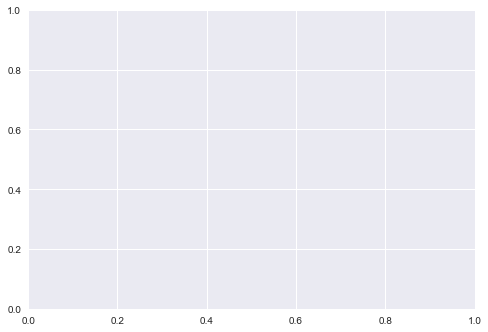

In [27]:
df2 = add.copy()
for c in ['CAUSE_LEVEL_1','Description']:
    df2[c] = df2[c].astype('category').cat.codes
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(add['CAUSE_LEVEL_1'],add['Description'])

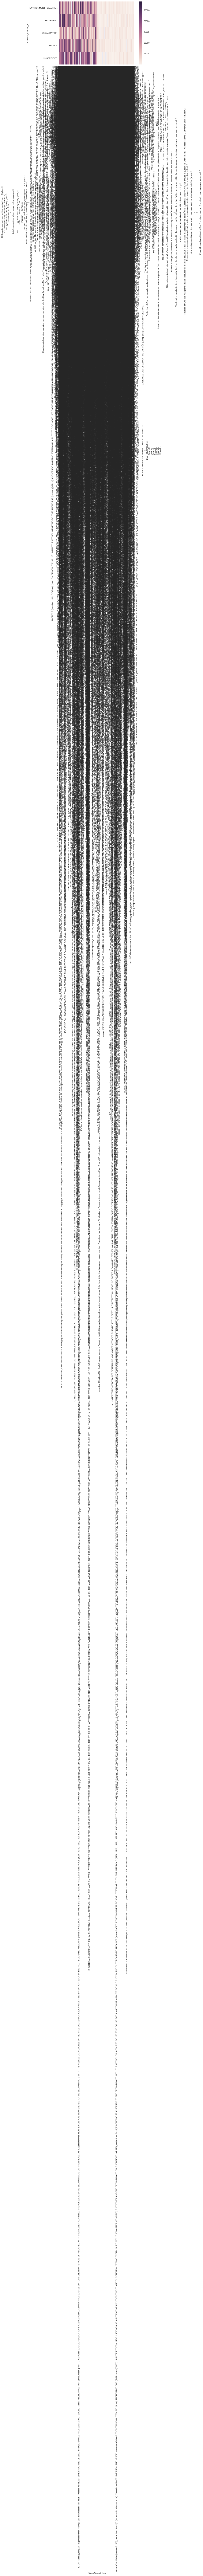

In [28]:
df3 =add.copy()
for c in ['CAUSE_LEVEL_1','Description']:
    df3[c] = df3[c].astype('category')
    
sns.heatmap( df3.pivot_table(index = 'CAUSE_LEVEL_1', columns = 'Description'))

In [29]:
import missingno as msno

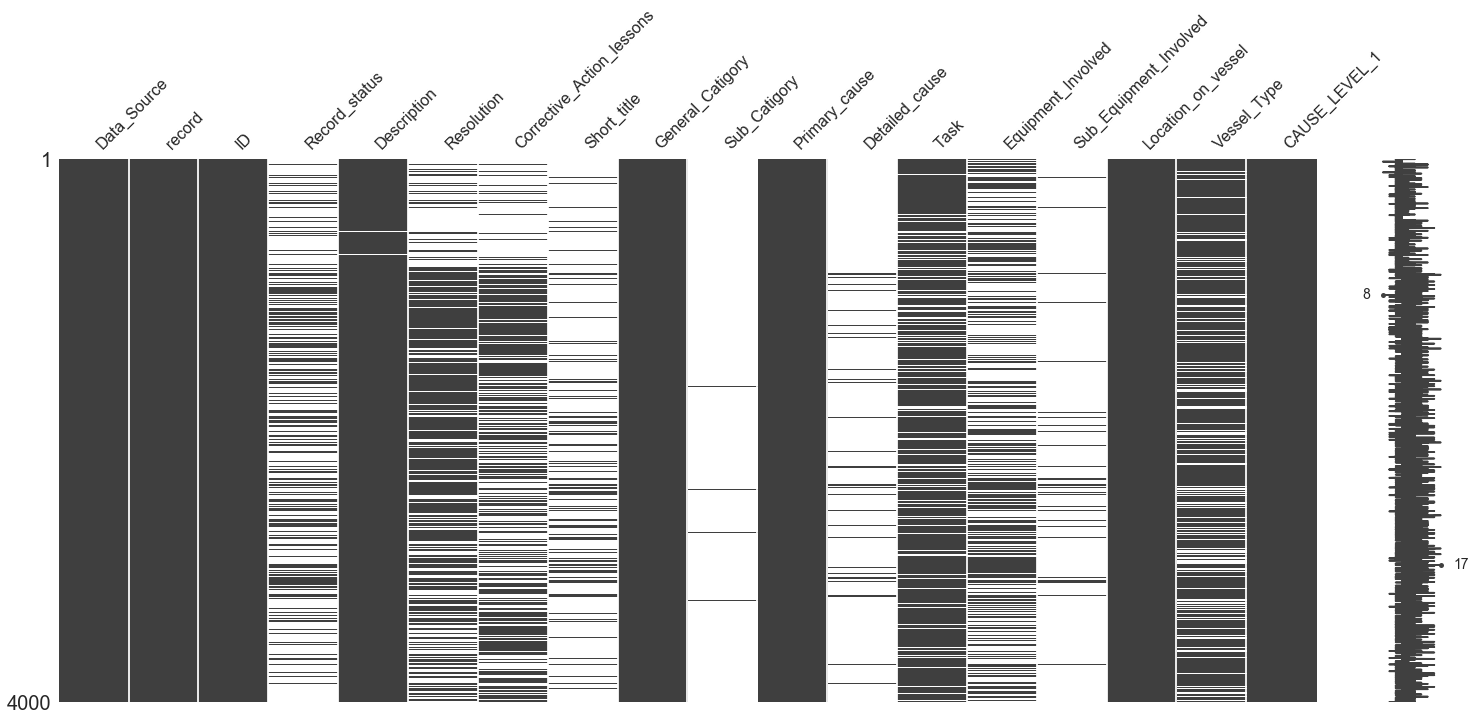

In [44]:
msno.matrix(add)

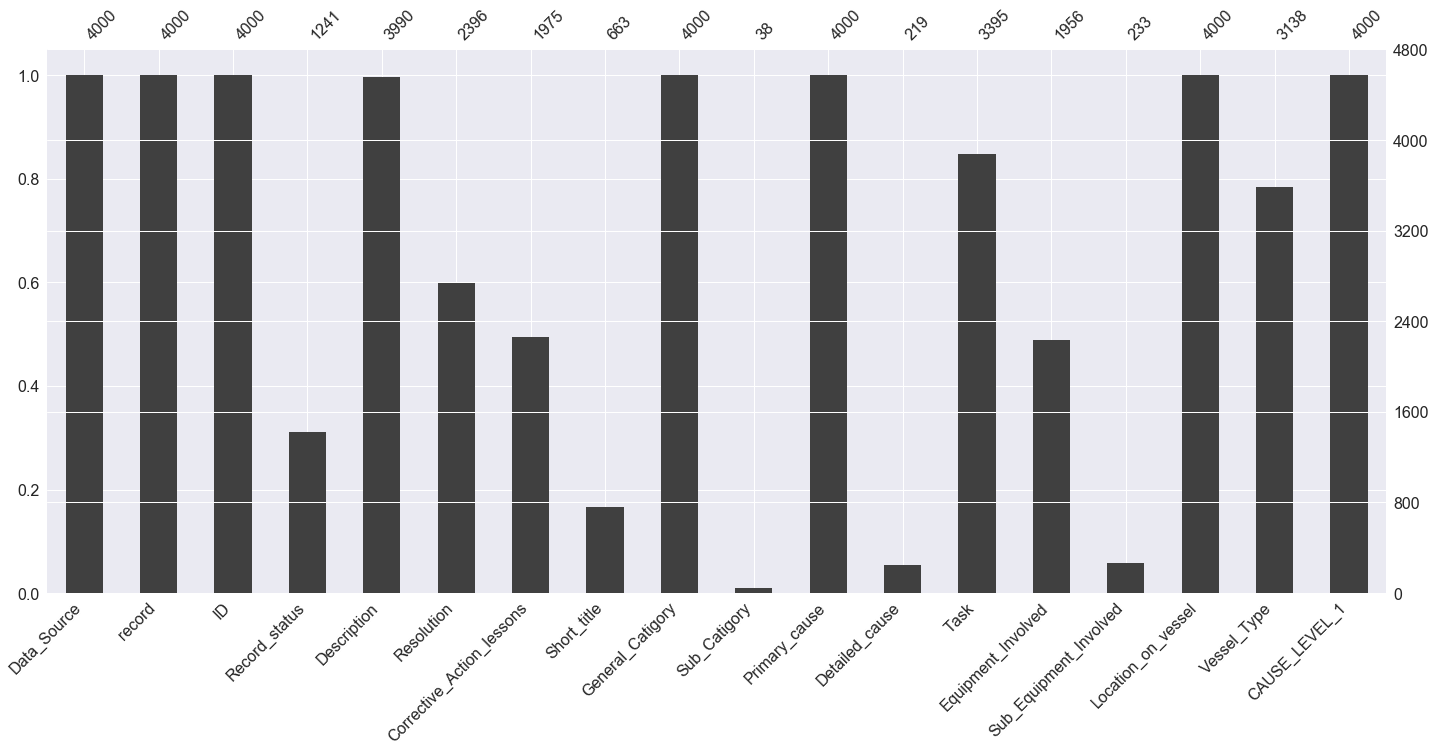

In [38]:
msno.bar(add)

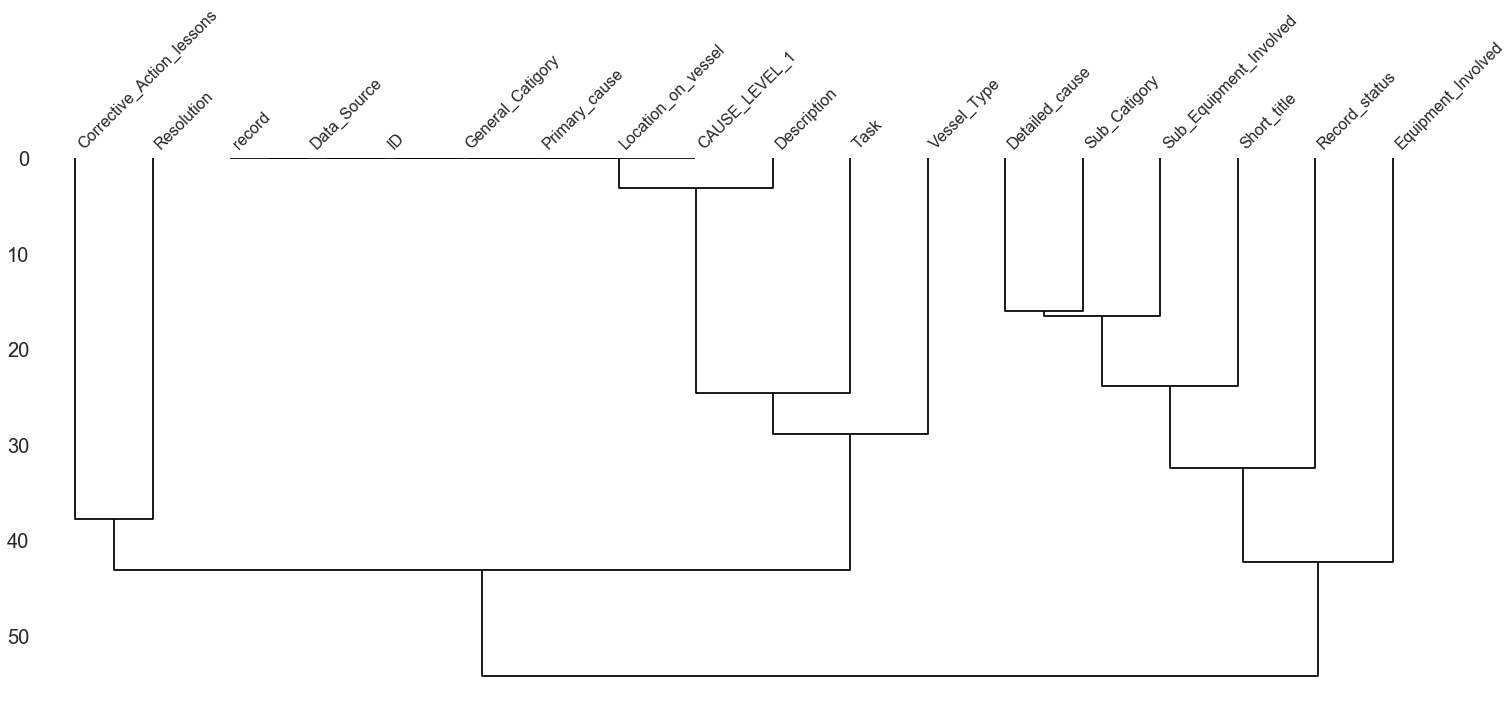

In [42]:
msno.dendrogram(add)

In [61]:
msno.dendrogram(add['Description'] add['CAUSE_LEVEL_1'])

AttributeError: 'Series' object has no attribute 'columns'

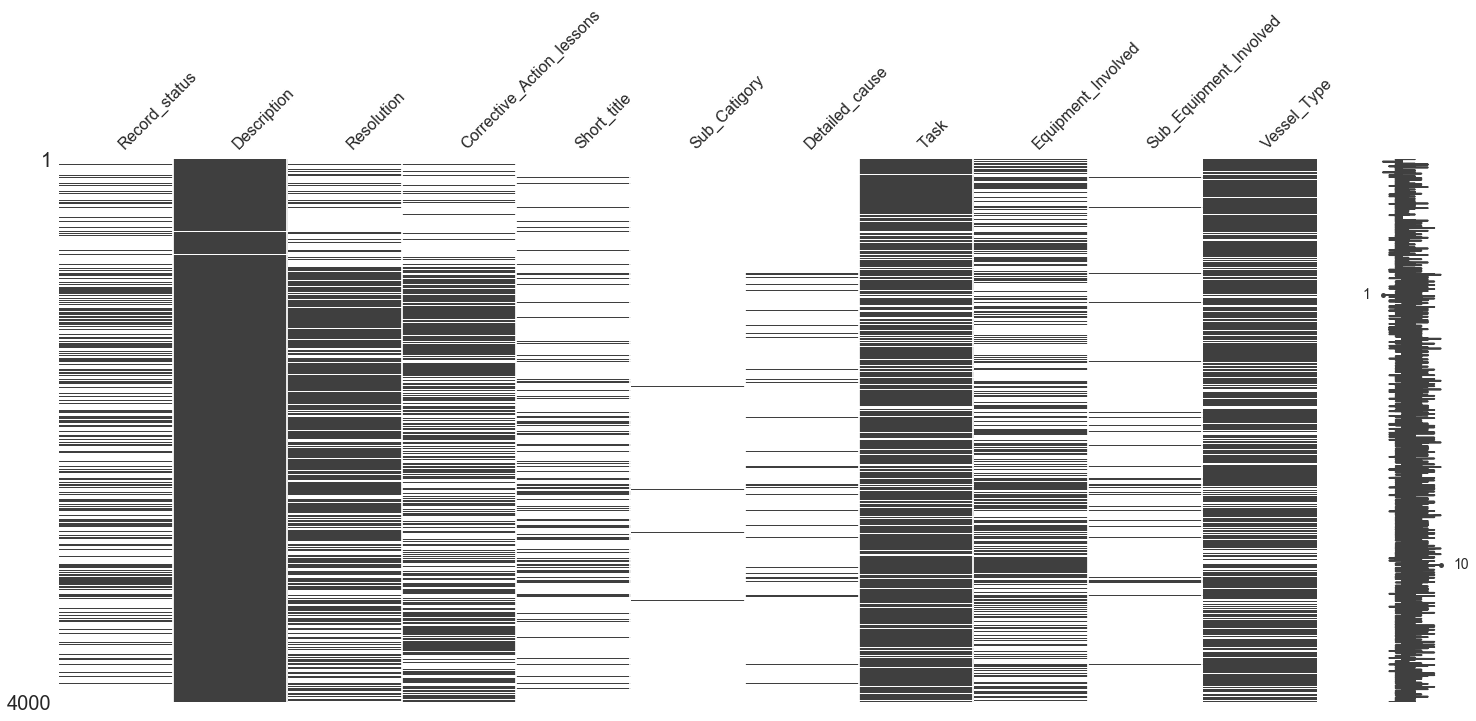

In [47]:
filtered_data = msno.nullity_filter(add, filter='bottom', n=15, p=0.999)
msno.matrix(filtered_data)

In [102]:
def dummy():
    for n in aorpus:
        vectorizer = CountVectorizer()
        k = vectorizer.fit_transformer(n.astype('U')).toarray()
    return k

In [58]:
import random
import leather

In [59]:
data = [
    (0, 3),
    (4, 5),
    (7, 9),
    (8, 4)
]

chart = leather.chart('Simple pairs')
chart.add_dots(data)
chart.to_svg('examples/charts/simple_pairs.svg')

TypeError: 'module' object is not callable

In [53]:
def colorizer(d):
    return 'rgb(%1, %1, %1)' % (d.x, d.y, 150)

chart = leather.Chart('colorized dots')
chart.add_dots(dot_data, fill_color=colorizer)
chart.to_svg('examples/charts/colorized_dots.svg')

ValueError: unsupported format character ',' (0x2c) at index 6

In [100]:
dummy('aorpus')

In [110]:
from sklearn.feature_extraction.text import HashingVectorizer

In [113]:
hv = HashingVectorizer()

In [116]:
j = hv.transform(aorpus)
j

<12x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [63]:
vectorizer = CountVectorizer(min_df=1)

In [117]:
k = vectorizer.fit_transform(j.astype('U')).toarray()

ValueError: unsupported data types in input

In [109]:
k = transformer.fit_transform(aorpus.astype('U')).toarray()

TypeError: no supported conversion for types: (dtype('O'),)

In [66]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000h',
 '009591959',
 '00h',
 '00hr',
 '00lt',
 '01',
 '0100',
 '0115',
 '0130h',
 '0136h',
 '0142',
 '0142h',
 '0143',
 '015',
 '0156h',
 '017',
 '01st',
 '02',
 '0200h',
 '0200hrs',
 '0250h',
 '03',
 '0300',
 '0300h',
 '0310lt',
 '0312h',
 '0312lt',
 '0325',
 '0330h',
 '03a',
 '04',
 '0400',
 '0400lt',
 '0400utc',
 '041',
 '0415',
 '042',
 '0430',
 '0456',
 '04m',
 '05',
 '050',
 '0500',
 '0500lt',
 '05lt',
 '06',
 '0600',
 '0615',
 '0630',
 '0650',
 '06â',
 '07',
 '0700',
 '0700h',
 '0700lt',
 '0730hrs',
 '0730z',
 '0736lt',
 '0745',
 '0748lt',
 '08',
 '0800',
 '0800h',
 '0800hrs',
 '0810',
 '0810lt',
 '0810z',
 '0811',
 '0812lt',
 '0816',
 '0817',
 '0825',
 '0830',
 '0830h',
 '0830hrs',
 '0830lt',
 '0835',
 '0836',
 '0836h',
 '0838h',
 '0840',
 '0840h',
 '0840lt',
 '0845lt',
 '0852lt',
 '09',
 '0900',
 '0900h',
 '0900hrs',
 '0900lt',
 '0903',
 '0907',
 '090deg',
 '0910',
 '0915hrs',
 '0918',
 '0928',
 '0930',
 '0937',
 '0949',
 '0950',
 '0951',
 '0952',
 '0954',
 

In [88]:
cause = add['CAUSE_LEVEL_1'].unique()
causes_dict = {value:index for index, value in enumerate(cause)}
n = add['CAUSE_LEVEL_1'].map(causes_dict)
causes_dict

{'ENVIRONMENT / WEATHER': 2,
 'EQUIPMENT': 3,
 'ORGANIZATION': 1,
 'PEOPLE': 4,
 'UNSPECIFIED': 0}

In [89]:
print('Aorpus size: %s' % len(vectorizer.get_feature_names()))

Aorpus size: 8596


In [90]:
k_train, k_test, n_train, n_test = cross_validation.train_test_split(k, n, test_size = 0.2 )

In [104]:
klf_dt = tree.DecisionTreeClassifier(max_depth=10)

In [105]:
klf_dt.fit_transform (k_train, n_train)
klf_dt.score_transform (k_test, n_test)

0.38124999999999998

In [93]:
klf_mn = MultinomialNB()
klf_mn.fit(k_train, n_train)
klf_mn.score(k_test, n_test)

0.50624999999999998

In [94]:
klf = KNeighborsClassifier(n_neighbors=5)
klf.fit(k_train, n_train)
klf.score(k_test, n_test)

0.32624999999999998

In [22]:
taws_df['CAUSE_LEVEL_1'].value_counts()

PEOPLE                   61087
EQUIPMENT                14339
ORGANIZATION              1625
ENVIRONMENT / WEATHER     1522
UNSPECIFIED                822
Name: CAUSE_LEVEL_1, dtype: int64

In [15]:
taws_df.count()

Data_Source                  79395
record                       79395
ID                           79395
Record_status                17714
Description                  79360
Resolution                   44876
Corrective_Action_lessons    43648
Short_title                  12163
General_Catigory             79395
Sub_Catigory                  1102
Primary_cause                79395
Detailed_cause                3524
Task                         68497
Equipment_Involved           41647
Sub_Equipment_Involved        3966
Location_on_vessel           79394
Vessel_Type                  58313
CAUSE_LEVEL_1                79395
dtype: int64

In [39]:
taws_df.shape

(79395, 18)

In [81]:
taws_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79395 entries, 0 to 79394
Data columns (total 18 columns):
Data_Source                  79395 non-null object
record                       79395 non-null int64
ID                           79395 non-null int64
Record_status                17714 non-null object
Description                  79360 non-null object
Resolution                   44876 non-null object
Corrective_Action_lessons    43648 non-null object
Short_title                  12163 non-null object
General_Catigory             79395 non-null object
Sub_Catigory                 1102 non-null object
Primary_cause                79395 non-null object
Detailed_cause               3524 non-null object
Task                         68497 non-null object
Equipment_Involved           41647 non-null object
Sub_Equipment_Involved       3966 non-null object
Location_on_vessel           79394 non-null object
Vessel_Type                  58313 non-null object
CAUSE_LEVEL_1                

In [82]:
taws_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79395 entries, 0 to 79394
Data columns (total 18 columns):
Data_Source                  79395 non-null object
record                       79395 non-null int64
ID                           79395 non-null int64
Record_status                17714 non-null object
Description                  79360 non-null object
Resolution                   44876 non-null object
Corrective_Action_lessons    43648 non-null object
Short_title                  12163 non-null object
General_Catigory             79395 non-null object
Sub_Catigory                 1102 non-null object
Primary_cause                79395 non-null object
Detailed_cause               3524 non-null object
Task                         68497 non-null object
Equipment_Involved           41647 non-null object
Sub_Equipment_Involved       3966 non-null object
Location_on_vessel           79394 non-null object
Vessel_Type                  58313 non-null object
CAUSE_LEVEL_1                

In [115]:
taws_df.memory_usage()

Index                            80
Data_Source                  635160
record                       635160
ID                           635160
Record_status                635160
Description                  635160
Resolution                   635160
Corrective_Action_lessons    635160
Short_title                  635160
General_Catigory             635160
Sub_Catigory                 635160
Primary_cause                635160
Detailed_cause               635160
Task                         635160
Equipment_Involved           635160
Sub_Equipment_Involved       635160
Location_on_vessel           635160
Vessel_Type                  635160
CAUSE_LEVEL_1                635160
dtype: int64

In [116]:
taws_df.memory_usage(deep=True)

Index                              80
Data_Source                   5605920
record                         635160
ID                             635160
Record_status                 3148026
Description                  19505681
Resolution                   11114046
Corrective_Action_lessons    10013346
Short_title                   3338681
General_Catigory              5653419
Sub_Catigory                  2583843
Primary_cause                 5442620
Detailed_cause                2722429
Task                          5554004
Equipment_Involved            4086763
Sub_Equipment_Involved        2670890
Location_on_vessel            5204820
Vessel_Type                   4409932
CAUSE_LEVEL_1                 5081592
dtype: int64

In [117]:
taws_df.memory_usage(deep=True).sum()

97406412

In [118]:
sorted(taws_df.CAUSE_LEVEL_1.unique())

['ENVIRONMENT / WEATHER', 'EQUIPMENT', 'ORGANIZATION', 'PEOPLE', 'UNSPECIFIED']

In [119]:
taws_df.CAUSE_LEVEL_1.head()

0                   PEOPLE
1    ENVIRONMENT / WEATHER
2                   PEOPLE
3                   PEOPLE
4                   PEOPLE
Name: CAUSE_LEVEL_1, dtype: object

In [120]:
taws_df['CAUSE_LEVEL_1'] = taws_df.CAUSE_LEVEL_1.astype('category')

In [121]:
taws_df.dtypes

Data_Source                    object
record                          int64
ID                              int64
Record_status                  object
Description                    object
Resolution                     object
Corrective_Action_lessons      object
Short_title                    object
General_Catigory               object
Sub_Catigory                   object
Primary_cause                  object
Detailed_cause                 object
Task                           object
Equipment_Involved             object
Sub_Equipment_Involved         object
Location_on_vessel             object
Vessel_Type                    object
CAUSE_LEVEL_1                category
dtype: object

In [122]:
taws_df.CAUSE_LEVEL_1.head()

0                   PEOPLE
1    ENVIRONMENT / WEATHER
2                   PEOPLE
3                   PEOPLE
4                   PEOPLE
Name: CAUSE_LEVEL_1, dtype: category
Categories (5, object): [ENVIRONMENT / WEATHER, EQUIPMENT, ORGANIZATION, PEOPLE, UNSPECIFIED]

In [123]:
taws_df.CAUSE_LEVEL_1.cat.codes.head()

0    3
1    0
2    3
3    3
4    3
dtype: int8

In [124]:
taws_df.memory_usage(deep=True)

Index                              80
Data_Source                   5605920
record                         635160
ID                             635160
Record_status                 3148026
Description                  19505681
Resolution                   11114046
Corrective_Action_lessons    10013346
Short_title                   3338681
General_Catigory              5653419
Sub_Catigory                  2583843
Primary_cause                 5442620
Detailed_cause                2722429
Task                          5554004
Equipment_Involved            4086763
Sub_Equipment_Involved        2670890
Location_on_vessel            5204820
Vessel_Type                   4409932
CAUSE_LEVEL_1                   79739
dtype: int64

In [125]:
type

type

In [126]:
taws_df['Description'] = taws_df.Description.astype('category', )

In [127]:
taws_df.memory_usage(deep=True)

Index                              80
Data_Source                   5605920
record                         635160
ID                             635160
Record_status                 3148026
Description                  19631381
Resolution                   11114046
Corrective_Action_lessons    10013346
Short_title                   3338681
General_Catigory              5653419
Sub_Catigory                  2583843
Primary_cause                 5442620
Detailed_cause                2722429
Task                          5554004
Equipment_Involved            4086763
Sub_Equipment_Involved        2670890
Location_on_vessel            5204820
Vessel_Type                   4409932
CAUSE_LEVEL_1                   79739
dtype: int64

In [128]:
taws_df['General_Catigory'].value_counts()

PPE NOT USED                            5602
EQUIPMENT CONDITION                     3092
ppe not used                            3013
HOUSEKEEPING                            2596
equipment condition                     2323
NEAR FIRE                               2046
NEAR STRUCK BY                          1529
FALL OR NEAR FALL                       1479
housekeeping                            1393
stowing objects                         1356
OTHER                                   1354
EQUIPMENT DAMAGE                        1254
near flying line                        1147
NEAR DAMAGE/BREAKDOWN                   1073
STOWING OBJECTS                         1052
FALLING OBJECT                           943
near fire                                940
NEAR SLIP/TRIP                           929
SLIP/TRIP                                925
COMMUNICATION                            914
NAVIGATION AND VESSEL MOVEMENT           876
FIRE PROTECTION                          844
PPE INCORR

In [129]:
taws_df[(taws_df.General_Catigory == 'PPE NOT USED') & (taws_df.CAUSE_LEVEL_1 == 'PEOPLE')]

Data_Source  record     ID Record_status  \
7          AESM obi_last ASME    1113  62889           NaN   
8          AESM obi_last ASME    1114  62890           NaN   
11         AESM obi_last ASME    1090  62866           NaN   
19         AESM obi_last ASME    1098  62874           NaN   
22         AESM obi_last ASME     110  61886           NaN   
26         AESM obi_last ASME    1105  62881           NaN   
34         AESM obi_last ASME    1156  62932           NaN   
35         AESM obi_last ASME    1157  62933           NaN   
52         AESM obi_last ASME    1677  63453           NaN   
54         AESM obi_last ASME    1680  63456           NaN   
61         AESM obi_last ASME    1828  63604           NaN   
69         AESM obi_last ASME    1835  63611           NaN   
78         AESM obi_last ASME    2370  64146           NaN   
88         AESM obi_last ASME    1551  63327           NaN   
98         AESM obi_last ASME    2142  63918           NaN   
100        AESM obi_last ASME    2144  63920           NaN   
101        AESM obi_last ASME    2145  63921           NaN   
102        AESM obi_last ASME    2147  63923           NaN   
112        AESM obi_last ASME    3056  64832           NaN   
113        AESM obi_last ASME    3057  64833           NaN   
119        AESM obi_last ASME    2799  64575           NaN   
130        AESM obi_last ASME    2949  64725           NaN   
131        AESM obi_last ASME     295  62071           NaN   
133        AESM obi_last ASME    2951  64727           NaN   
137        AESM obi_last ASME    2955  64731           NaN   
140        AESM obi_last ASME    2958  64734           NaN   
142        AESM obi_last ASME     296  62072           NaN   
145        AESM obi_last ASME     324  62100           NaN   
149        AESM obi_last ASME    3243  65019           NaN   
155        AESM obi_last ASME     112  61888           NaN   
...                       ...     ...    ...           ...   
75855  TH_Q1_Q2_2015_B_T_Slim    2688  73385           NaN   
75941  TH_Q1_Q2_2015_B_T_Slim    2765  73462           NaN   
76003  TH_Q1_Q2_2015_B_T_Slim    2833  73530           NaN   
76109  TH_Q1_Q2_2015_B_T_Slim     293  70990           NaN   
76272  TH_Q1_Q2_2015_B_T_Slim    3104  73801           NaN   
76308  TH_Q1_Q2_2015_B_T_Slim    3145  73842           NaN   
76312  TH_Q1_Q2_2015_B_T_Slim    3149  73846           NaN   
76382  TH_Q1_Q2_2015_B_T_Slim    4296  74993           NaN   
76609  TH_Q1_Q2_2015_B_T_Slim    3390  74087           NaN   
76760  TH_Q1_Q2_2015_B_T_Slim    3534  74231           NaN   
76991  TH_Q1_Q2_2015_B_T_Slim    3743  74440           NaN   
77298  TH_Q1_Q2_2015_B_T_Slim    4044  74741           NaN   
77904  TH_Q1_Q2_2015_B_T_Slim    4593  75290           NaN   
78393  TH_Q1_Q2_2015_B_T_Slim    5024  75721           NaN   
78539  TH_Q1_Q2_2015_B_T_Slim    5198  75895           NaN   
78566  TH_Q1_Q2_2015_B_T_Slim     523  71220           NaN   
78692  TH_Q1_Q2_2015_B_T_Slim     887  71584           NaN   
78712  TH_Q1_Q2_2015_B_T_Slim     799  71496           NaN   
78754  TH_Q1_Q2_2015_B_T_Slim    5389  76086           NaN   
78768  TH_Q1_Q2_2015_B_T_Slim    5414  76111           NaN   
78920  TH_Q1_Q2_2015_B_T_Slim    5572  76269           NaN   
78990  TH_Q1_Q2_2015_B_T_Slim     581  71278           NaN   
79035  TH_Q1_Q2_2015_B_T_Slim      63  70760           NaN   
79071  TH_Q1_Q2_2015_B_T_Slim     662  71359           NaN   
79138  TH_Q1_Q2_2015_B_T_Slim     735  71432           NaN   
79173  TH_Q1_Q2_2015_B_T_Slim     767  71464           NaN   
79206  TH_Q1_Q2_2015_B_T_Slim     812  71509           NaN   
79226  TH_Q1_Q2_2015_B_T_Slim     830  71527           NaN   
79243  TH_Q1_Q2_2015_B_T_Slim     846  71543           NaN   
79342  TH_Q1_Q2_2015_B_T_Slim     943  71640           NaN   

                                             Description  \
7      Deck Crew not wearing Safety Helmet while work...   
8      During bunkering operation found 4/E not wear 

In [130]:
taws_df[(taws_df.General_Catigory == 'PPE NOT USED') & (taws_df.CAUSE_LEVEL_1 == 'PEOPLE')].count()

Data_Source                  5532
record                       5532
ID                           5532
Record_status                  56
Description                  5532
Resolution                   2215
Corrective_Action_lessons    3517
Short_title                   383
General_Catigory             5532
Sub_Catigory                  243
Primary_cause                5532
Detailed_cause                  3
Task                         4615
Equipment_Involved           3179
Sub_Equipment_Involved          4
Location_on_vessel           5532
Vessel_Type                  3995
CAUSE_LEVEL_1                5532
dtype: int64

In [131]:
taws_df[(taws_df.General_Catigory == 'PPE NOT USED') & (taws_df.CAUSE_LEVEL_1 == 'PEOPLE')].count()

Data_Source                  5532
record                       5532
ID                           5532
Record_status                  56
Description                  5532
Resolution                   2215
Corrective_Action_lessons    3517
Short_title                   383
General_Catigory             5532
Sub_Catigory                  243
Primary_cause                5532
Detailed_cause                  3
Task                         4615
Equipment_Involved           3179
Sub_Equipment_Involved          4
Location_on_vessel           5532
Vessel_Type                  3995
CAUSE_LEVEL_1                5532
dtype: int64

In [132]:
(taws_df.General_Catigory == 'PPE NOT USED') & (taws_df.CAUSE_LEVEL_1 == 'PEOPLE')

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7         True
8         True
9        False
10       False
11        True
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19        True
20       False
21       False
22        True
23       False
24       False
25       False
26        True
27       False
28       False
29       False
         ...  
79365    False
79366    False
79367    False
79368    False
79369    False
79370    False
79371    False
79372    False
79373    False
79374    False
79375    False
79376    False
79377    False
79378    False
79379    False
79380    False
79381    False
79382    False
79383    False
79384    False
79385    False
79386    False
79387    False
79388    False
79389    False
79390    False
79391    False
79392    False
79393    False
79394    False
dtype: bool

In [133]:
taws_df[(taws_df.General_Catigory == 'PPE NOT USED') | (taws_df.General_Catigory == 'ppe not used' | (taws_df.CAUSE_LEVEL_1 == 'PEOPLE')]

SyntaxError: invalid syntax (<ipython-input-133-11d4eb0fbad6>, line 1)

In [134]:
taws_df.General_Catigory.isin(['PPE NOT USED', 'ppe not used', 'HOUSEKEEPING '])

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7         True
8         True
9        False
10       False
11        True
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19        True
20       False
21       False
22        True
23       False
24       False
25       False
26        True
27       False
28       False
29       False
         ...  
79365    False
79366    False
79367    False
79368    False
79369    False
79370    False
79371    False
79372    False
79373    False
79374    False
79375    False
79376    False
79377    False
79378     True
79379    False
79380     True
79381    False
79382    False
79383     True
79384    False
79385    False
79386    False
79387    False
79388    False
79389    False
79390    False
79391    False
79392    False
79393     True
79394    False
Name: General_Catigory, dtype: bool

In [135]:
taws_df[taws_df.General_Catigory.isin(['PPE NOT USED', 'ppe not used', 'HOUSEKEEPING '])]

Data_Source  record     ID Record_status  \
7          AESM obi_last ASME    1113  62889           NaN   
8          AESM obi_last ASME    1114  62890           NaN   
11         AESM obi_last ASME    1090  62866           NaN   
19         AESM obi_last ASME    1098  62874           NaN   
22         AESM obi_last ASME     110  61886           NaN   
26         AESM obi_last ASME    1105  62881           NaN   
34         AESM obi_last ASME    1156  62932           NaN   
35         AESM obi_last ASME    1157  62933           NaN   
52         AESM obi_last ASME    1677  63453           NaN   
54         AESM obi_last ASME    1680  63456           NaN   
61         AESM obi_last ASME    1828  63604           NaN   
69         AESM obi_last ASME    1835  63611           NaN   
78         AESM obi_last ASME    2370  64146           NaN   
88         AESM obi_last ASME    1551  63327           NaN   
98         AESM obi_last ASME    2142  63918           NaN   
100        AESM obi_last ASME    2144  63920           NaN   
101        AESM obi_last ASME    2145  63921           NaN   
102        AESM obi_last ASME    2147  63923           NaN   
112        AESM obi_last ASME    3056  64832           NaN   
113        AESM obi_last ASME    3057  64833           NaN   
119        AESM obi_last ASME    2799  64575           NaN   
130        AESM obi_last ASME    2949  64725           NaN   
131        AESM obi_last ASME     295  62071           NaN   
133        AESM obi_last ASME    2951  64727           NaN   
137        AESM obi_last ASME    2955  64731           NaN   
140        AESM obi_last ASME    2958  64734           NaN   
142        AESM obi_last ASME     296  62072           NaN   
145        AESM obi_last ASME     324  62100           NaN   
149        AESM obi_last ASME    3243  65019           NaN   
155        AESM obi_last ASME     112  61888           NaN   
...                       ...     ...    ...           ...   
79241  TH_Q1_Q2_2015_B_T_Slim     844  71541           NaN   
79243  TH_Q1_Q2_2015_B_T_Slim     846  71543           NaN   
79244  TH_Q1_Q2_2015_B_T_Slim     847  71544           NaN   
79245  TH_Q1_Q2_2015_B_T_Slim     848  71545           NaN   
79249  TH_Q1_Q2_2015_B_T_Slim     851  71548           NaN   
79252  TH_Q1_Q2_2015_B_T_Slim     854  71551           NaN   
79256  TH_Q1_Q2_2015_B_T_Slim     858  71555           NaN   
79262  TH_Q1_Q2_2015_B_T_Slim     863  71560           NaN   
79265  TH_Q1_Q2_2015_B_T_Slim     866  71563           NaN   
79266  TH_Q1_Q2_2015_B_T_Slim     867  71564           NaN   
79269  TH_Q1_Q2_2015_B_T_Slim      87  70784           NaN   
79279  TH_Q1_Q2_2015_B_T_Slim     879  71576           NaN   
79280  TH_Q1_Q2_2015_B_T_Slim      88  70785           NaN   
79297  TH_Q1_Q2_2015_B_T_Slim     902  71599           NaN   
79299  TH_Q1_Q2_2015_B_T_Slim     904  71601           NaN   
79303  TH_Q1_Q2_2015_B_T_Slim     908  71605           NaN   
79309  TH_Q1_Q2_2015_B_T_Slim     913  71610           NaN   
79311  TH_Q1_Q2_2015_B_T_Slim     915  71612           NaN   
79316  TH_Q1_Q2_2015_B_T_Slim      92  70789           NaN   
79320  TH_Q1_Q2_2015_B_T_Slim     923  71620           NaN   
79328  TH_Q1_Q2_2015_B_T_Slim     930  71627           NaN   
79334  TH_Q1_Q2_2015_B_T_Slim     936  71633           NaN   
79342  TH_Q1_Q2_2015_B_T_Slim     943  71640           NaN   
79361  TH_Q1_Q2_2015_B_T_Slim     960  71657           NaN   
79362  TH_Q1_Q2_2015_B_T_Slim     961  71658           NaN   
79363  TH_Q1_Q2_2015_B_T_Slim     962  71659           NaN   
79378  TH_Q1_Q2_2015_B_T_Slim     976  71673           NaN   
79380  TH_Q1_Q2_2015_B_T_Slim     978  71675           NaN   
79383  TH_Q1_Q2_2015_B_T_Slim     989  71686           NaN   
79393  TH_Q1_Q2_2015_B_T_Slim     998  71695           NaN   

                                             Description  \
7      Deck Crew not wearing Safety Helmet while work...   
8      During bunkering operation found 4/E not wear 

In [136]:
fg = taws_df[taws_df.General_Catigory.isin(['PPE NOT USED', 'ppe not used', 'HOUSEKEEPING '])]

In [137]:
fg.count()

Data_Source                  8615
record                       8615
ID                           8615
Record_status                 737
Description                  8613
Resolution                   3708
Corrective_Action_lessons    4163
Short_title                   934
General_Catigory             8615
Sub_Catigory                  243
Primary_cause                8615
Detailed_cause                231
Task                         7241
Equipment_Involved           5831
Sub_Equipment_Involved        278
Location_on_vessel           8615
Vessel_Type                  5492
CAUSE_LEVEL_1                8615
dtype: int64

In [91]:
fg['Data_Source'].value_counts()

TH_Q1_Q2_2015_B_T_Slim           1146
AESM obi_last ASME                907
NYKSMcaroline_last                770
NYK Sirkan                        764
CHinar NYK1                       737
OSG                               527
NYK part 2 2016                   450
NYK_File_1_2016                   410
chinar unstarted 8_16             403
Tammie_file Th_Q4_2015_tanker     401
HKG-Pedro                         364
Q2_Thome_Tanker                   334
Q3_2014_Thome_Tanker              318
OBI_ASME                          272
AESM_SET1                         243
Mearsk All                        123
Ksea2300PDF                        76
Crowley05_08                       44
OSF_APR14_MAY15_SLIM               40
Mearsk_word                        34
Anon                                6
Keystone                            2
Crowley09                           2
Q1_Tankerome_Tanker_2229            1
Q1_Tankerome_Tanker_2580            1
Q1_Tankerome_Tanker_3115            1
Q1_Tankerome

In [92]:
fg['Description_length'] = fg.Description.apply(len)

In [93]:
fg.loc[:, ['Description', 'Description_length']]

Description  Description_length
7      Deck Crew not wearing Safety Helmet while work...                  88
8      During bunkering operation found 4/E not wear ...                  53
11     The Fitter was noticed by the master coming on...                 228
19     Ch Off found moving on deck without Safety hel...                  63
22     MTM & Wiper found not wearing safety helmet wh...                  74
26     It was observed that ,while doing the decarb o...                 209
34     Bosun found standing on no.4 hatch coaming tra...                 158
35     1 deck crew not wearing goggles while cleaning...                  69
52     One engine crew was found handling chemical wi...                  83
54     One of the Engine crew member found working at...                  98
61     FOR PUTTING CANVAS COVER ON RESCUE BOAT STEERI...                 101
69     CREW WORKING AT FORWARD WINDLASS USING BUFFING...                  78
78     5TH ENGINEER FOUND WEARING SLIPPERS ON ENGINE ...                  50
88     Pump man and OS working at anchor station at t...                 102
98     G.S was found working in floaters/open-toe san...                  69
100    When Vessel en-route. 2/Officer carried out Li...                 108
101    When Vessel en-route. 2/Officer carried out Li...                 108
102    When Vessel en-route. 2/Officer carried out Li...                 108
112    OILER CLEANED LO FILTERS WITHOUT WEARING SAFET...                  55
113    OILER CLEANED LO FILTERS WITHOUT WEARING SAFET...                  55
119    OBSERVED 1 PERSON WORKING IN E/R W/O SAFETY HE...                  50
130    Crew not wearing Helmet during routine round i...                  64
131    WHILE TAKING SAFETY ROUNDS , PRIOR COMMENCEMEN...                 158
133    Crew not wearing Helmet during routine round i...                  64
137    Crew not wearing Helmet during routine round i...                  64
140    ONE OF THE CREW MEMBERS CLIMBING THE MAST WITH...                  65
142    MASTER NOTICED FROM BRIDGE ONE DUTY ENGNR ON D...                 289
145    Able Seaman standing on Pipeline and doing pai...                  79
149    IT WAS OBSERVED THAT WHILE OVERHAULING QACs OF...                 295
155    OS NOT WEARING A SAFETY BELT WHILE CLEANING TH...                  83
...                                                  ...                 ...
79241  One of the dock worker doing chipping under ma...                  93
79243  During unmooring operations one of the crew se...                 131
79244  One dock worker entering Ballast tank without ...                  58
79245  One of the dock mooring man was not wearing gl...                  75
79249  One of the personnel from shore or the mooring...                 109
79252  One crew did not wear the safety belt when rig...                 129
79256  One crew forgot to wear his safety helmet when...                  77
79262  One crew member was painting on the crane with...                  92
79265  One crew member forgot to wear his helmet when...                  77
79266  One shore cargo surveyor came on board without...                  70
79269           Rigging a gangway without safety harness                  40
79279                                    Not wearing PPE                  15
79280                Crew member not wearing proper PPE.                  35
79297  Crew was applying razor wire with normal worki...                  79
79299  Crew was going to clean bridge windows without...                  62
79303  crew was doing chipping/painting under the man...                 122
79309  Crew was going for tank mopping inside tank an...                  97
79311  ONE MOORING MAN WAS NOT WEARING THE HELMET ON ...                  51
79316       No safety harness present on all crane cabin                  44
79320  MOORING GANG CREW MEMBER NOT WEARING HELMET AT...                  62
79328  ONE CREW MEMBER WAS CHIPPING ON DE

In [94]:
taws_df.isnull().tail()

Data_Source record     ID Record_status Description Resolution  \
79390       False  False  False          True       False       True   
79391       False  False  False          True       False       True   
79392       False  False  False          True       False       True   
79393       False  False  False          True       False       True   
79394       False  False  False          True       False       True   

      Corrective_Action_lessons Short_title General_Catigory Sub_Catigory  \
79390                      True        True            False         True   
79391                      True        True            False         True   
79392                      True        True            False         True   
79393                      True        True            False         True   
79394                      True        True            False         True   

      Primary_cause Detailed_cause   Task Equipment_Involved  \
79390         False           True  False              False   
79391         False           True  False              False   
79392         False           True  False              False   
79393         False           True  False              False   
79394         False           True  False              False   

      Sub_Equipment_Involved Location_on_vessel Vessel_Type CAUSE_LEVEL_1  
79390                   True              False        True         False  
79391                   True              False        True         False  
79392                   True              False        True         False  
79393                   True              False        True         False  
79394                   True              False        True         False

In [ ]:
taws_df.isnull().sum()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
taws_df[taws_df.Primary_cause == 'PEOPLE']

In [ ]:
taws_df['Primary_cause'].value_counts()

In [40]:
transformer = TfidfTransformer(smooth_idf=False)

In [41]:
transformer 

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [42]:
corpus = taws_df.loc[:, 'Description']

In [43]:
corpus

0        J/Eng was checking the chemical racks, where h...
1        One stay wire connected to Christmas Tree loos...
2        I found out that Pilot combination ladder (P) ...
3        AT (Time). One crew member kept food in microw...
4        During loading operations in (Location) by shi...
5        BEFORE WHEN WE WERE ENTERING INTO CARGO HOLD N...
6        Loading Master Found Using Cell Phone On deck,...
7        Deck Crew not wearing Safety Helmet while work...
8        During bunkering operation found 4/E not wear ...
9        One of the crew members lost his eye goggles i...
10       GENERATOR SPARE CYLINDER HEAD WAS FOUND UNSECU...
11       The Fitter was noticed by the master coming on...
12       It was found that there was a fire in the dust...
13       As i enter the crew mess to get some water to ...
14       A CREW MEMBER WAS OBSERVED WALKING DOWN THE ST...
15       DURING ROUTINE CHECKING AROUND DECK FOUND AB  ...
16          The tug broke the ships rope while pulling i

In [44]:
vectorizer = CountVectorizer(min_df=1)

In [45]:
X = vectorizer.fit_transform(corpus.astype('U')).toarray()

In [46]:
print (X.shape)

(79395, 32578)


In [47]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '0000h',
 '0000hrs',
 '0001',
 '0001lt',
 '0002',
 '0003',
 '0003456',
 '0005',
 '0006',
 '0008',
 '000nb',
 '000t',
 '001',
 '0010',
 '00100lt',
 '0010h',
 '0011',
 '0015',
 '0015h',
 '0015lt',
 '0016',
 '002',
 '0020',
 '0022',
 '0024',
 '0025',
 '00250lt',
 '0025h',
 '0029',
 '002d',
 '003',
 '0030',
 '0030hrs',
 '0033',
 '0035',
 '0037',
 '00399',
 '004',
 '0042lt',
 '0045',
 '0045hrs',
 '0050hrs',
 '005s',
 '006',
 '007',
 '008',
 '0081',
 '009',
 '009591959',
 '00am',
 '00h',
 '00h18',
 '00hr',
 '00hrs',
 '00lt',
 '00m',
 '01',
 '0100',
 '0100h',
 '0100hrs',
 '0100lt',
 '0105',
 '0105h',
 '0106',
 '0110',
 '0110h',
 '0110hrs',
 '0115',
 '0115hrs',
 '0118',
 '011vwd',
 '0120',
 '0125hrs',
 '0125lt',
 '013',
 '0130',
 '0130h',
 '0130hr',
 '0130z',
 '0136h',
 '0138',
 '013vwd',
 '014',
 '0140',
 '0140gmt',
 '0140lt',
 '0142',
 '0142h',
 '0143',
 '0145',
 '015',
 '0150',
 '0156h',
 '017',
 '0171z',
 '01and',
 '01fig',
 '01no',
 '01st',
 '02',
 '0200',
 '0200h

In [49]:
causes = taws_df["CAUSE_LEVEL_1"].unique()
cause_dict = {value:index for index, value in enumerate(causes)}
y = taws_df["CAUSE_LEVEL_1"].map(cause_dict)
cause_dict

{'ENVIRONMENT / WEATHER': 1,
 'EQUIPMENT': 2,
 'ORGANIZATION': 4,
 'PEOPLE': 0,
 'UNSPECIFIED': 3}

In [50]:
print ("corpuse size: %s" % len(vectorizer.get_feature_names()))

corpuse size: 32578


In [51]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [52]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

MemoryError: 

In [61]:
y_test

71083    0
40018    0
25660    0
4955     0
28960    0
6534     0
22353    0
26368    0
48845    0
53213    2
58979    2
36985    0
30690    0
31161    0
47824    0
59993    0
7903     0
60924    0
38171    0
43781    0
41271    0
1752     2
3898     0
68827    1
75016    0
77364    0
30483    0
71358    3
60536    0
43802    0
        ..
5521     4
35985    0
53816    0
78605    0
75418    2
67046    0
73669    0
7752     0
2438     0
63118    2
26144    0
22476    0
1619     0
78005    2
21862    2
15516    0
36467    0
21585    0
61184    2
17346    0
63381    2
52945    0
35788    0
27880    0
34976    0
8082     0
45745    0
19520    0
58813    2
51568    0
Name: CAUSE_LEVEL_1, dtype: int64

In [62]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

In [63]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.78594369922539198

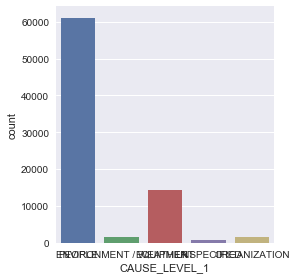

In [34]:
sns.factorplot('CAUSE_LEVEL_1', data=taws_df, kind='count')

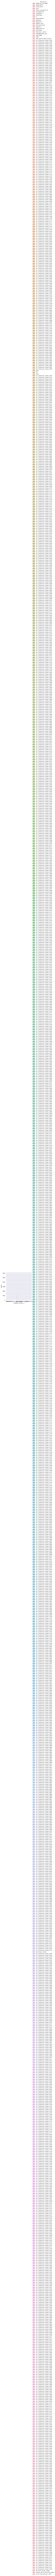

In [16]:
sns.factorplot('CAUSE_LEVEL_1', data=taws_df, hue='Data_Source', kind ='count' )